In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [5]:
dataset = pd.read_csv('Churn.csv', sep=";")
dataset.shape
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
dataset.columns = ["id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [140]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<Axes: xlabel='Estado'>

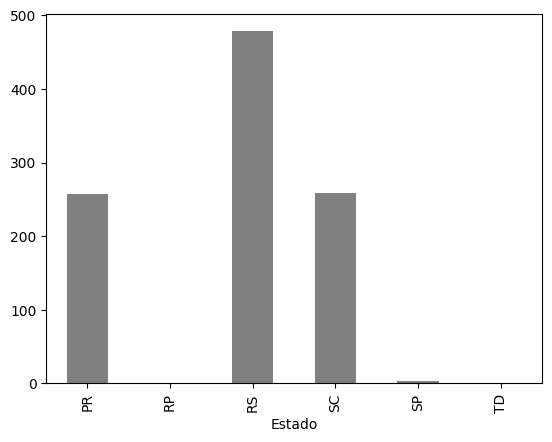

In [75]:
conjuntoPorEstado = dataset.groupby(["Estado"]).size()
conjuntoPorEstado
conjuntoPorEstado.plot.bar(color = 'gray')

<Axes: xlabel='Genero'>

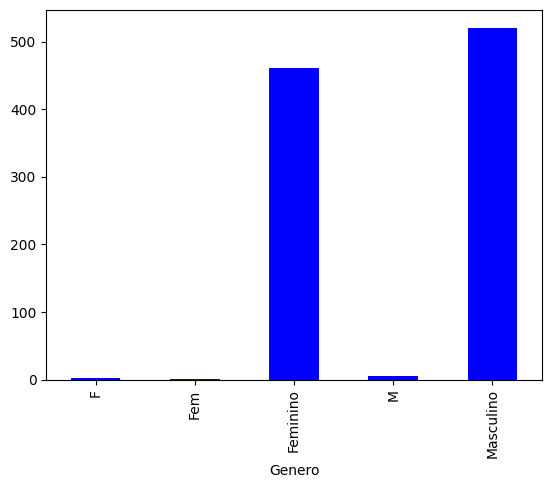

In [76]:
conjuntoPorGenero = dataset.groupby(['Genero']).size()
conjuntoPorGenero.plot.bar(color="blue")

In [77]:
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

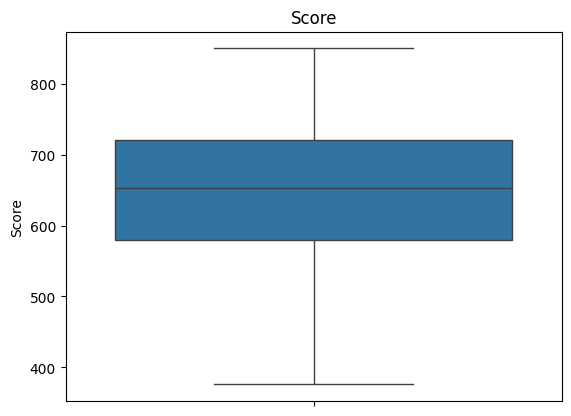

In [29]:
srn.boxplot(dataset["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

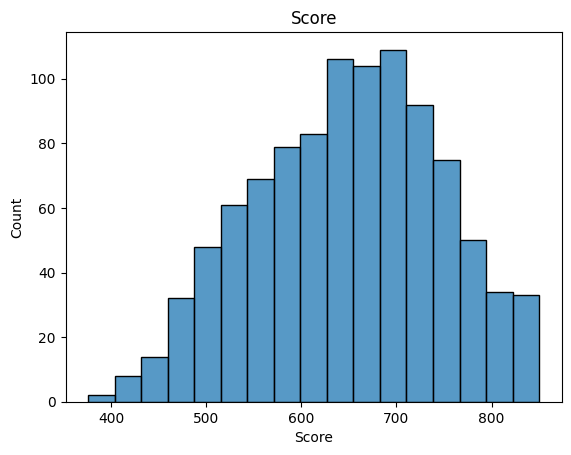

In [37]:
srn.histplot(dataset["Score"]).set_title("Score")

In [38]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

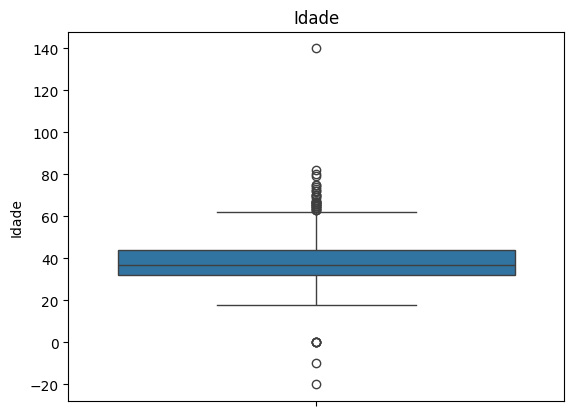

In [39]:
srn.boxplot(dataset["Idade"]).set_title('Idade')

Text(0.5, 1.0, 'Idade')

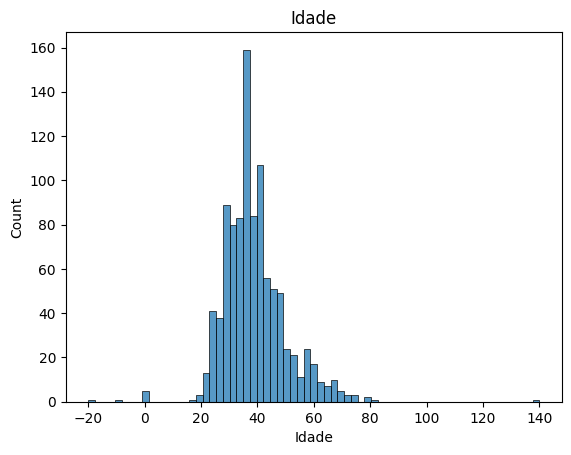

In [43]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [44]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

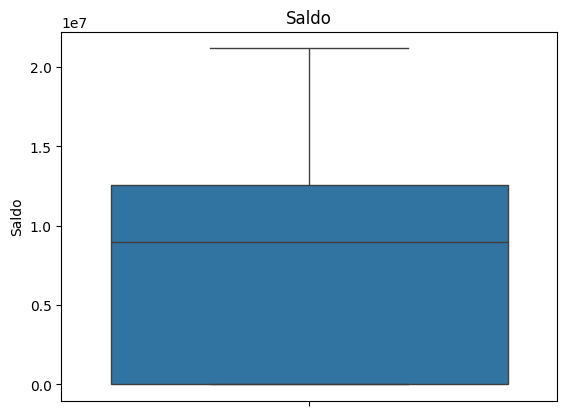

In [45]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

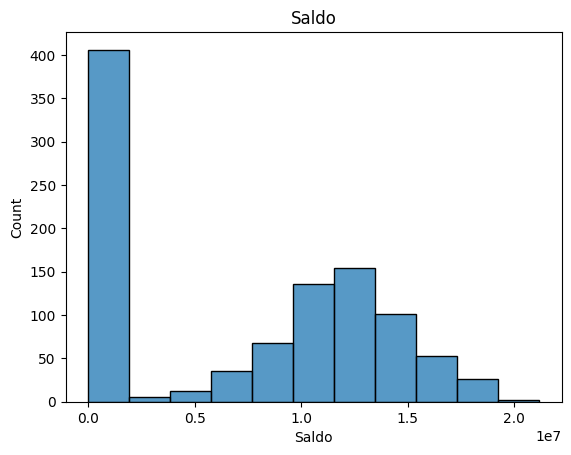

In [46]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [48]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

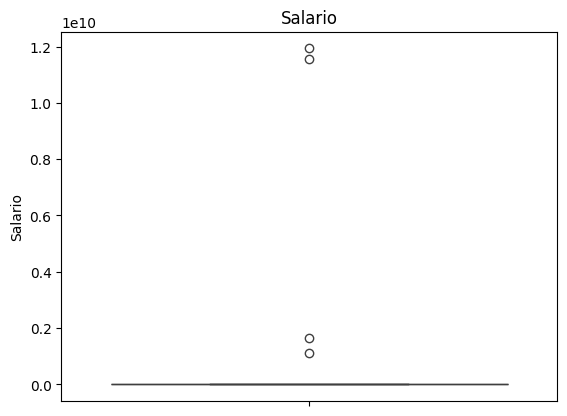

In [49]:
srn.boxplot(dataset['Salario']).set_title('Salario')

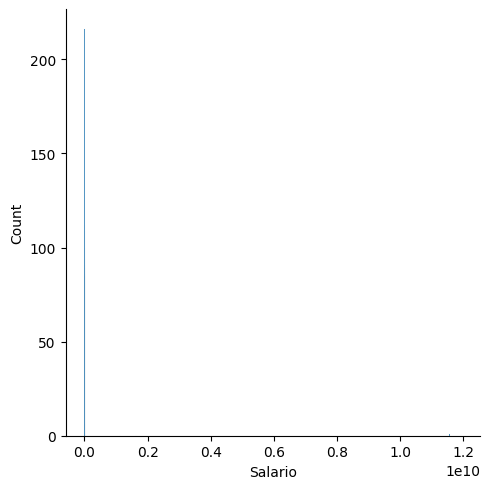

In [11]:
srn.displot(dataset['Salario'])

In [141]:
dataset.isnull().sum()

id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [142]:
# Substituindo os NaN pela mediana no Salario
    # Mediana do salario
mediana = sts.median(dataset['Salario'])
    # Preenchendo os NaN com a mediana
dataset['Salario'].fillna(mediana, inplace=True)


In [143]:
dataset['Salario'].isnull().sum()

0

In [144]:
dataset['Genero'].isnull().sum()

8

In [145]:
# Padronizando os valores nulos na coluna Genero com a moda 

dataset['Genero'].fillna('Masculino', inplace=True)

In [146]:
dataset['Genero'].isnull().sum()

0

In [147]:
# Padronizando o Genero escrito de várias formas diferentes

dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F', 'Fem']), 'Genero'] = 'Feminino'

In [148]:
grupoGenero = dataset.groupby(['Genero']).size()
grupoGenero

Genero
Feminino     464
Masculino    535
dtype: int64

<Axes: xlabel='Genero', ylabel='Count'>

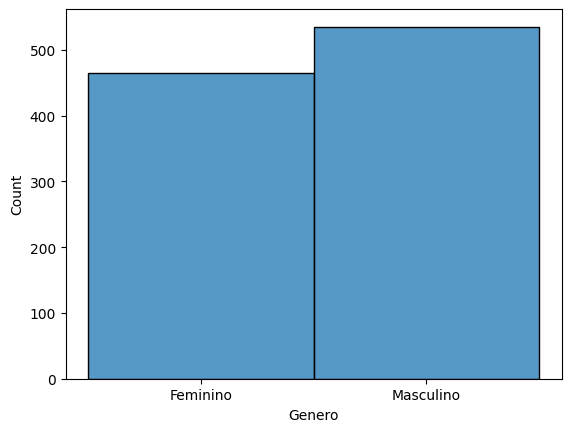

In [93]:
srn.histplot(dataset['Genero'])

In [94]:
dataset.head(30)

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,1.013489e+07,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,1.125426e+07,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,1.139316e+07,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9.382663e+06,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,7.908410e+05,0
5,6,645,SC,Masculino,44,8,11375578,2,1,0,1.497567e+07,1
6,7,822,RS,Masculino,50,7,0,2,1,1,1.006280e+05,0
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
8,9,501,RS,Masculino,44,4,14205107,2,0,1,7.494050e+05,0
9,10,684,RS,Masculino,27,2,13460388,1,1,1,7.172573e+06,0


In [95]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [149]:
dataset.loc[(dataset['Idade'] < 0 ) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [150]:
# Colocando a mediana em idades irreais
medianaIdade = sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = medianaIdade

In [151]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


<Axes: xlabel='Idade'>

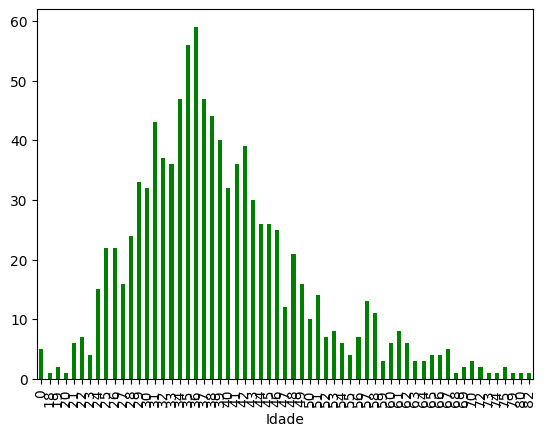

In [109]:
grupoIdade = dataset.groupby(dataset['Idade']).size()
grupoIdade.plot.bar(color='green')

Text(0.5, 1.0, 'Idade')

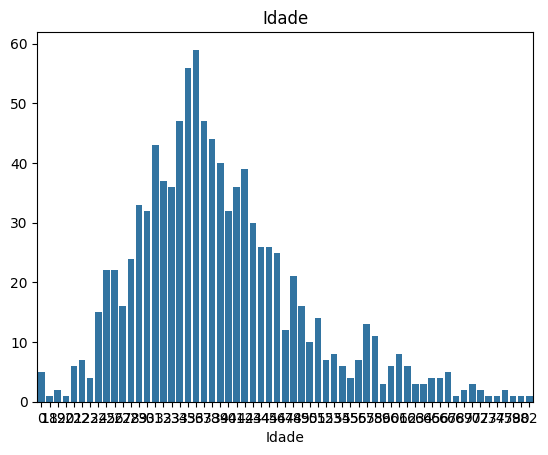

In [111]:
srn.barplot(grupoIdade).set_title('Idade')

Text(0.5, 1.0, 'Idade')

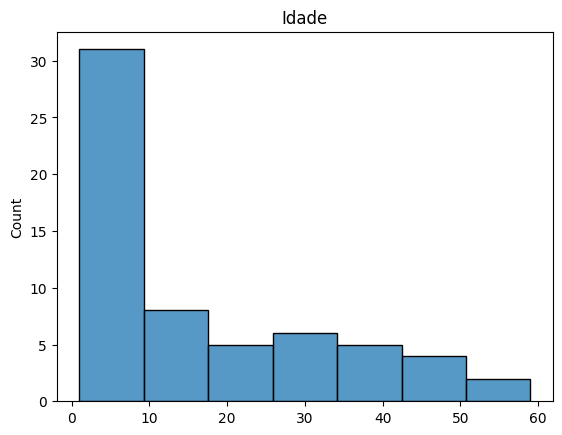

In [113]:
srn.histplot(grupoIdade).set_title('Idade')

In [156]:
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
# Excluindo os dados em duplicidade
dataset[dataset.drop_duplicates(['id'], keep='first',inplace=True)]


In [157]:
dataset.loc[(dataset['id'] == 81)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [126]:
grupoEstado = dataset.groupby(dataset['Estado']).size()
grupoEstado

Estado
PR    257
RP      1
RS    476
SC    258
SP      4
TD      1
dtype: int64

In [128]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

In [129]:
grupoEstado = dataset.groupby(dataset['Estado']).size()
grupoEstado

Estado
PR    257
RS    482
SC    258
dtype: int64

Text(0.5, 1.0, 'Estado')

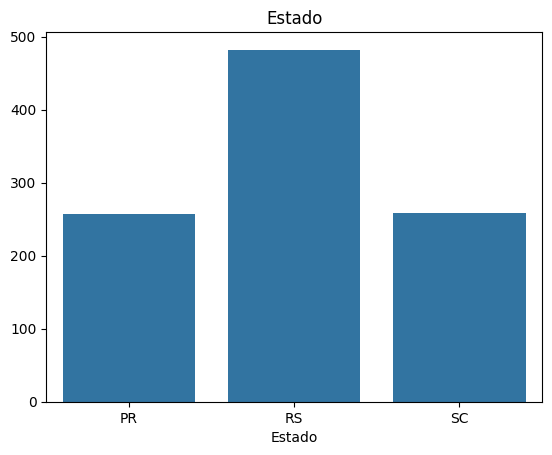

In [132]:
srn.barplot(grupoEstado).set_title('Estado')


In [159]:
# Calcular o desvio padrão. Considerando: Se o valor for 2 vezes maior que a média (2 x desvio padrão) ele será alterado.
desv = sts.stdev(dataset['Salario'])
dataset.loc[dataset['Salario'] >= 2 * desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [160]:
# Substituindo o desvio padrão pela mediana
medianaSalario = sts.median(dataset['Salario'])
dataset.loc[dataset['Salario'] >= 2 * desv] = medianaSalario


In [161]:
dataset.loc[dataset['Salario'] >= 2 * desv]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [162]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [164]:
dataset.shape

(998, 12)